In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tv-shows-on-netflix-prime-video-hulu-and-disney/tv_shows.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings
import collections
warnings.filterwarnings("ignore")
import plotly
import plotly.express as px
from plotly.subplots import make_subplots


In [3]:
pip install ggplot

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os

/kaggle/input/tv-shows-on-netflix-prime-video-hulu-and-disney/tv_shows.csv


In [5]:
tv_shows = pd.read_csv('tv_shows.csv')
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [6]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [7]:
tv_shows.shape

(5611, 11)

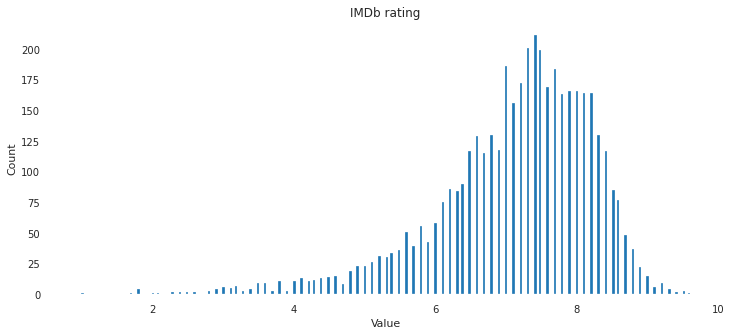

In [8]:
plt.figure(figsize=(12, 5))
plt.hist(tv_shows['IMDb'].values, bins=250)
plt.title('IMDb rating')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

First we remove the unwanted columns in the process of data cleaning.

we will drop duplicates based on title

In [9]:
tv_shows.drop_duplicates(subset='Title',keep='first',inplace=True)

# **Feature Scaling**
First fill the novalues/NaN with zeros and convert both of them into integers.
Convert both ratings IMDB and Rotten Tomatoes on common scale ie. on 100.

In [10]:
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].fillna('0%')
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].apply(lambda x : x.rstrip('%'))
tv_shows['Rotten Tomatoes'] = pd.to_numeric(tv_shows['Rotten Tomatoes'])

tv_shows['IMDb'] = tv_shows['IMDb'].fillna(0)
tv_shows['IMDb'] = tv_shows['IMDb']*10
tv_shows['IMDb'] = tv_shows['IMDb'].astype('int')

In [11]:
tv_shows['IMDb'].head()

0    95
1    88
2    84
3    91
4    87
Name: IMDb, dtype: int64

In [12]:
tv_shows['Rotten Tomatoes'].head()

0    96
1    93
2    91
3    78
4    97
Name: Rotten Tomatoes, dtype: int64

here we converted both the ratings into same scale on 100.

# **Wide to Long Format Conversion**
Plotting of the charts would be easier if we get the 1s and 0s in the columns Netflix,Hulu,Disney+ & Prime Video under a categorical section videos, also there might be cases wherin the same show is present in more than one service.

In [13]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Disney+','Prime Video']],id_vars=['Title'],var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'],inplace=True)

In [14]:
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,95,96,1,0,0,0,1
1,1,Stranger Things,2016,16+,88,93,1,0,0,0,1
2,2,Money Heist,2017,18+,84,91,1,0,0,0,1
3,3,Sherlock,2010,16+,91,78,1,0,0,0,1
4,4,Better Call Saul,2015,18+,87,97,1,0,0,0,1


now merge the netflix,prime,hulu and desney into one column, which has categorical data. 

In [15]:
tv_shows_merged = tv_shows_long.merge(tv_shows, on='Title', how='inner')

In [16]:
tv_shows_merged.drop(columns = ['Unnamed: 0','Netflix','Hulu', 'Prime Video', 'Disney+', 'type'], inplace=True,axis = 1)


In [17]:
tv_shows_merged.head()

,Title,StreamingOn,Year,Age,IMDb,Rotten Tomatoes
0,Breaking Bad,Netflix,2008,18+,95,96
1,Stranger Things,Netflix,2016,16+,88,93
2,Money Heist,Netflix,2017,18+,84,91
3,Sherlock,Netflix,2010,16+,91,78
4,Better Call Saul,Netflix,2015,18+,87,97


Firstly to get the Service with the most content

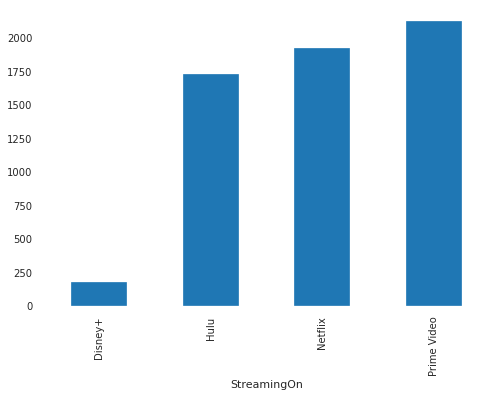

In [18]:
tv_shows_merged.groupby('StreamingOn').Title.count().plot(kind='bar')\

Scatter plot between IMDB and Rotten tomatoes ratings to get the streaming service that has best of both worlds.

In [19]:
tv_shows_ratings = tv_shows_merged[(tv_shows_merged.IMDb > 0) & tv_shows_merged['Rotten Tomatoes'] > 0]
px.scatter(tv_shows_ratings, x='IMDb',y='Rotten Tomatoes',color='StreamingOn')

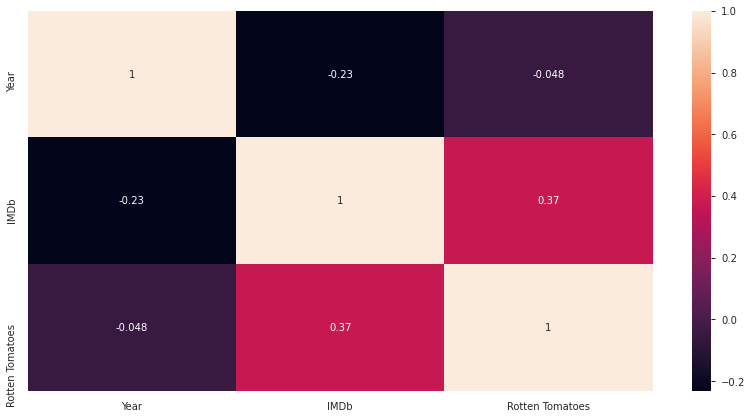

In [20]:
corr = tv_shows_ratings.corr(method='kendall')
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True)